# Задание

На основе датасета titanic обучить дерево решений

Подобрать оптимальную глубину дерева так же, как мы делали на занятии

Определить самые важные фичи

Визуализировать полученное дерево

In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
# загружаем данные
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Предобработка

In [53]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [54]:
df.describe(include=[ 'object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kink, Mr. Vincenz",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [55]:
df['Embarked'] = df['Embarked'].fillna('S')

In [56]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [57]:
df=pd.get_dummies(df, columns=['Embarked'])
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [59]:
df_work = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [60]:
X = df_work[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
y = df_work.Survived

# Обучение классификатора и подбор глубины

In [61]:
clf = DecisionTreeClassifier()

In [62]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
from sklearn.model_selection import GridSearchCV
cs = np.array([i for i in range(2,101)])
cs

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [67]:
grid = {'max_depth': cs}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [68]:
gridsearch.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,

In [69]:
gridsearch.best_params_

{'max_depth': 6}

In [70]:
best_param = gridsearch.best_params_["max_depth"]

In [71]:
clf = DecisionTreeClassifier(max_depth=best_param)

In [72]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Определение самых важных фичей

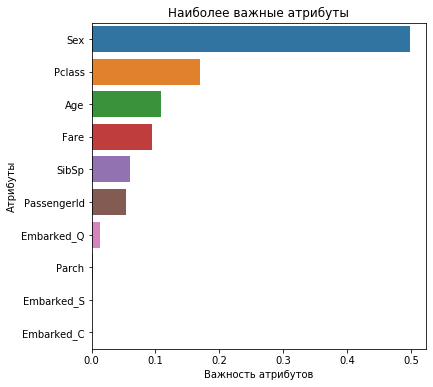

In [73]:
feature_imp = pd.Series(clf.feature_importances_,index=list(X.columns)).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

# Визуализация дерева

In [74]:
from sklearn.tree import export_graphviz

In [75]:
print(export_graphviz(clf, out_file=None, filled=True, feature_names=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], class_names=['Not Survived', 'Survived']))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Not Survived", fillcolor="#f5cfb4"] ;
1 [label="Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Survived", fillcolor="#7ebfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived", fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label="Fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Survived", fillcolor="#43a2e6"] ;
2 -> 6 ;
7 [label="Fare <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]

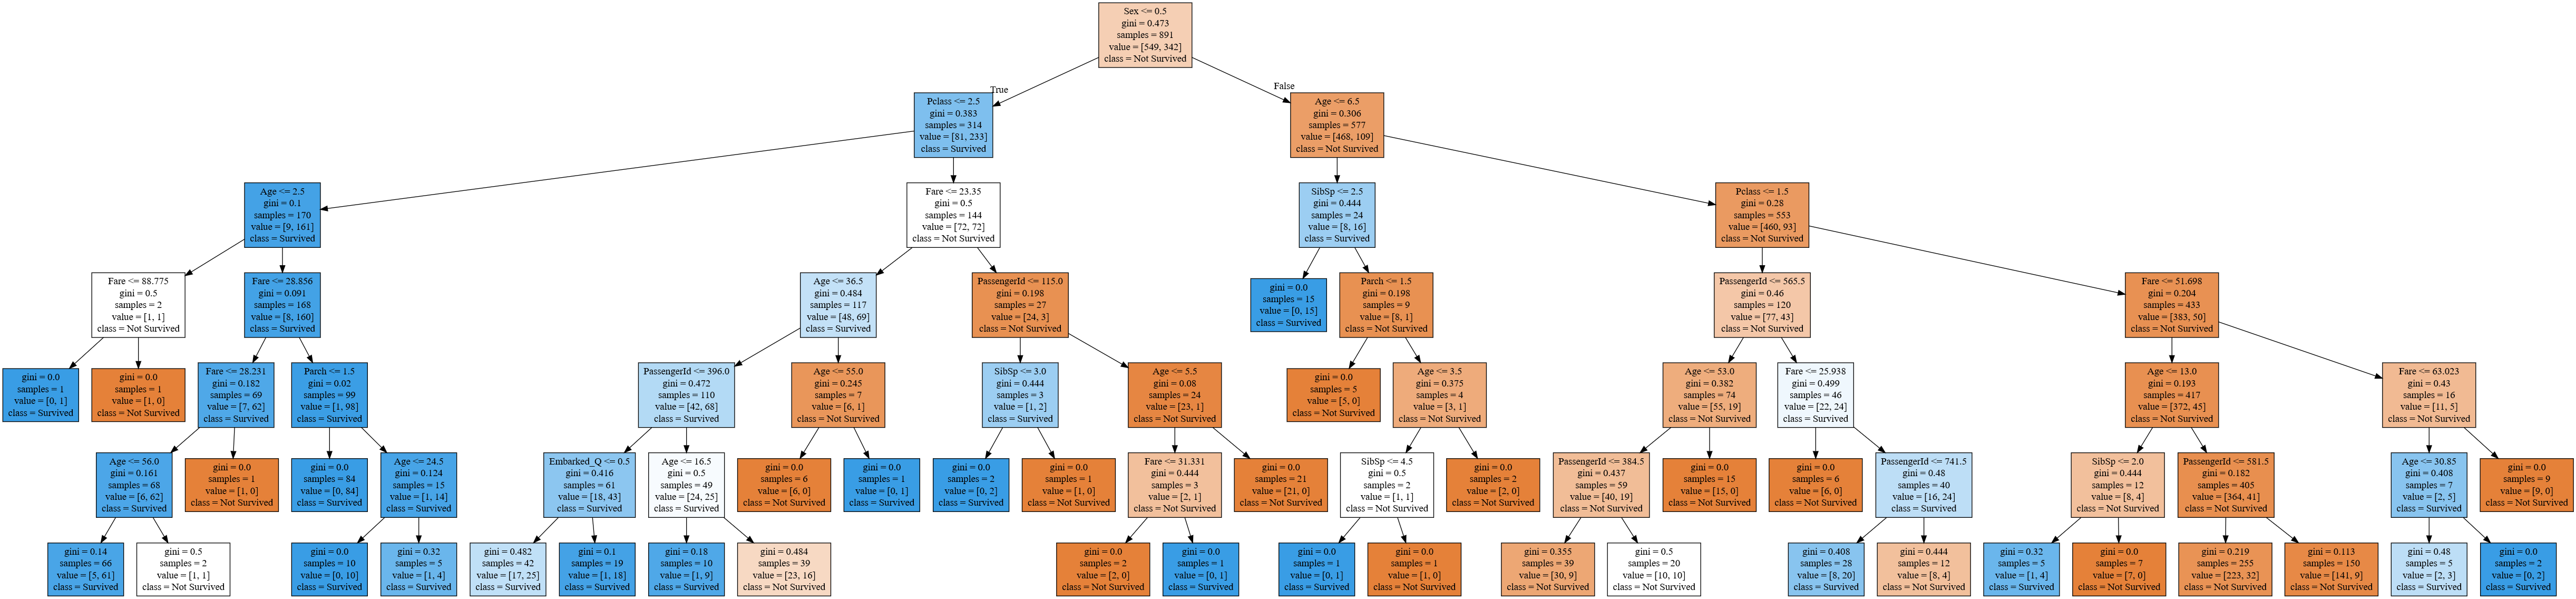

In [76]:
from IPython.display import Image
Image("webgraphviz.png")